# **TUIA - Aprendizaje Automático 2 - 2024**

---

**Materia:** Aprendizaje Automático II

**Año académico:** 2024

**Período lectivo:** 2° cuatrimestre

**Integrantes:**
- Menescaldi, Brisa
- Britos, Julián Francisco


# Cargamos los datos

In [1]:
import pandas as pd

file_path = "Student_Performance.csv"
studen_performance = pd.read_csv(file_path, sep=",", engine="python")

# Analisis estadistico descriptivo

In [2]:
studen_performance

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [3]:
studen_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


- Ninguna fila es completamente nulos.
- Existen 2 tipos de datos continuos y categoricos.

In [4]:
# VALORES FALTANTES EN EL DATASET
studen_performance.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

- No existen valores faltantes

In [5]:
studen_performance.describe(include='all')

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,No,NaN,NaN,NaN
freq,NaN,NaN,5052,NaN,NaN,NaN
mean,4.992900,69.445700,NaN,6.530600,4.583300,55.224800
std,2.589309,17.343152,NaN,1.695863,2.867348,19.212558
min,1.000000,40.000000,NaN,4.000000,0.000000,10.000000
25%,3.000000,54.000000,NaN,5.000000,2.000000,40.000000
50%,5.000000,69.000000,NaN,7.000000,5.000000,55.000000
75%,7.000000,85.000000,NaN,8.000000,7.000000,71.000000


- Pareciero no tener Outliers

In [6]:
studen_performance.replace({'Yes': 1, 'No': 0}, inplace=True)

C:\Users\src4\AppData\Local\Temp\ipykernel_28564\1247512010.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  studen_performance.replace({'Yes': 1, 'No': 0}, inplace=True)


In [7]:
studen_performance

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


## Matriz de correlación

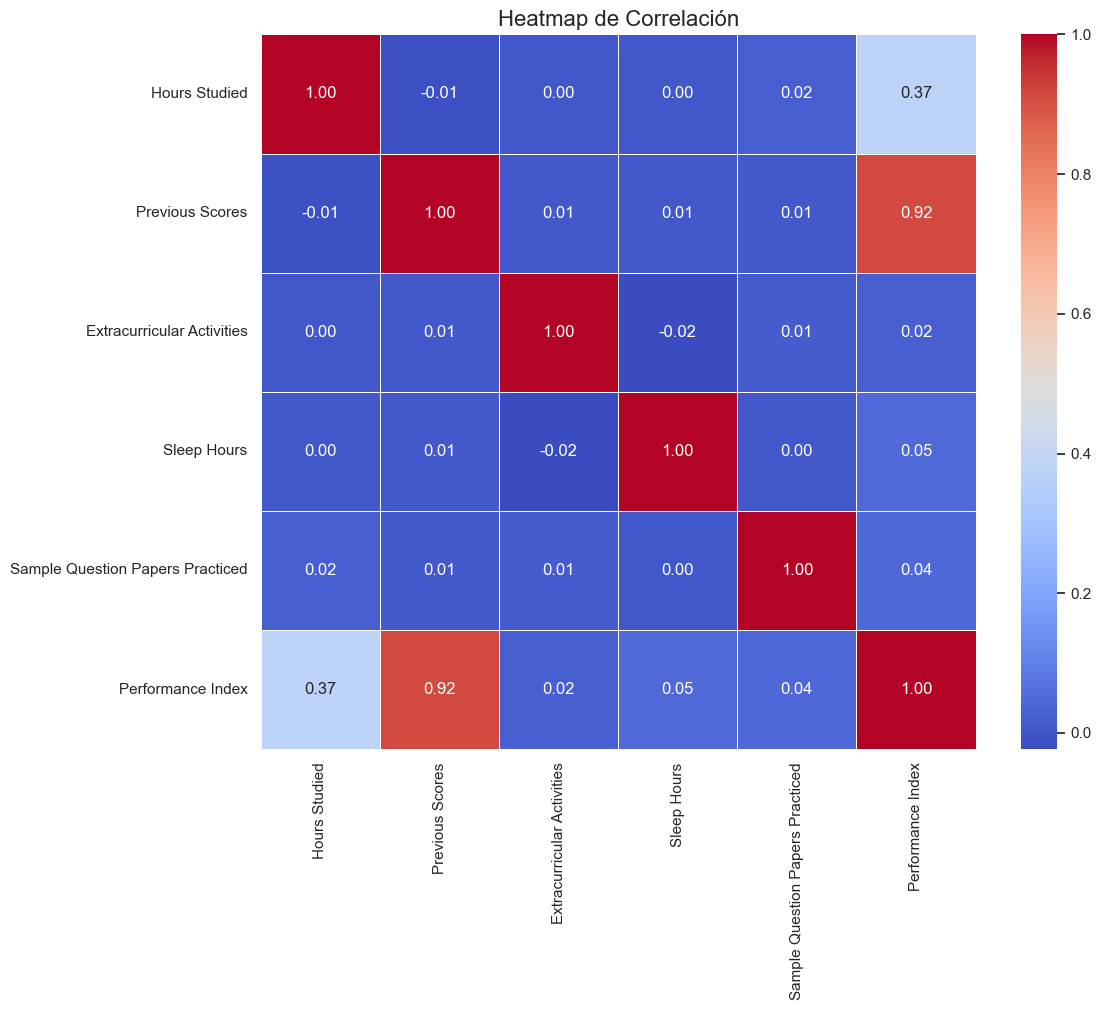

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la correlación entre las variables
correlation = studen_performance.corr()

sns.set_theme()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', square=True)
plt.title('Heatmap de Correlación', fontsize=16)
plt.tight_layout()
plt.show()

Vemos que hay dos variables independientes que que pueden llegar a tener una alta (Hours Studied con 0.37) y muy alta (Previous Scores con 0.92) correlacion lineal con la variable dependiente (target Performance Index)

## Graficos de las variables independientes

In [9]:
studen_performance.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

### Hours Studied

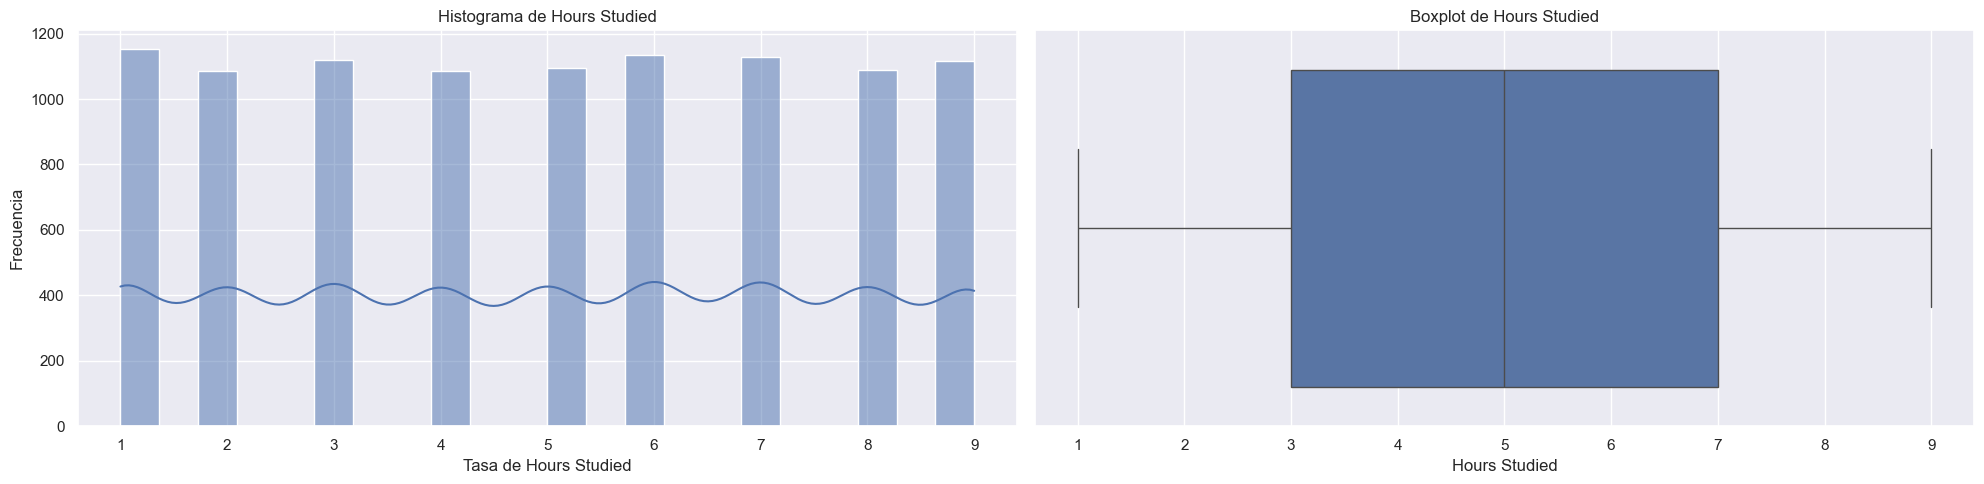

count    10000.000000
mean         4.992900
std          2.589309
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Hours Studied, dtype: float64

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(studen_performance['Hours Studied'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de Hours Studied')
axs[0].set_xlabel('Tasa de Hours Studied')
axs[0].set_ylabel('Frecuencia')

# Cuartiles
q1 = studen_performance['Hours Studied'].quantile(0.25)
q2 = studen_performance['Hours Studied'].quantile(0.5)
q3 = studen_performance['Hours Studied'].quantile(0.75)

# Boxplot
sns.boxplot(x=studen_performance['Hours Studied'], ax=axs[1])
axs[1].set_title('Boxplot de Hours Studied')
axs[1].set_xlabel('Hours Studied')

plt.tight_layout()
plt.show()

studen_performance['Hours Studied'].describe()

No tiene outliers

### Previous Scores

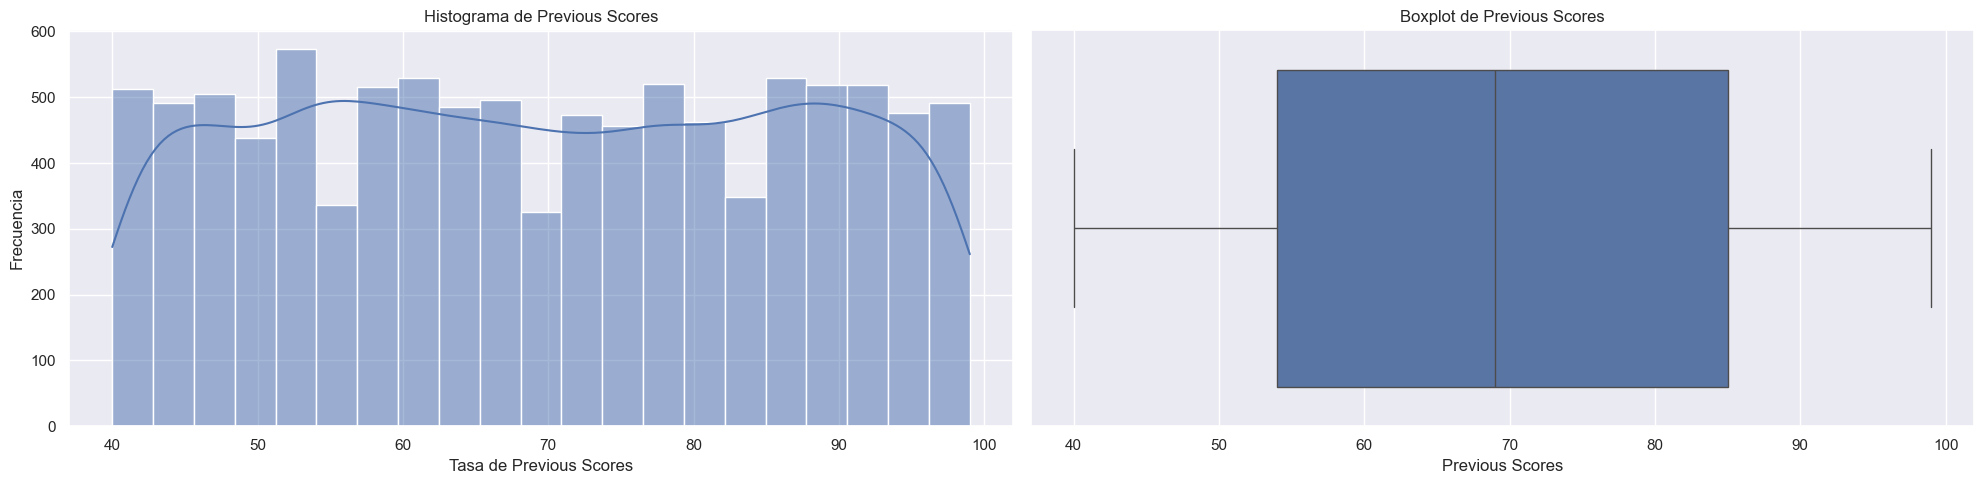

count    10000.000000
mean        69.445700
std         17.343152
min         40.000000
25%         54.000000
50%         69.000000
75%         85.000000
max         99.000000
Name: Previous Scores, dtype: float64

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(studen_performance['Previous Scores'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de Previous Scores')
axs[0].set_xlabel('Tasa de Previous Scores')
axs[0].set_ylabel('Frecuencia')

# Cuartiles
q1 = studen_performance['Previous Scores'].quantile(0.25)
q2 = studen_performance['Previous Scores'].quantile(0.5)
q3 = studen_performance['Previous Scores'].quantile(0.75)

# Boxplot
sns.boxplot(x=studen_performance['Previous Scores'], ax=axs[1])
axs[1].set_title('Boxplot de Previous Scores')
axs[1].set_xlabel('Previous Scores')

plt.tight_layout()
plt.show()

studen_performance['Previous Scores'].describe()

No hay outliers

### Sleep Hours

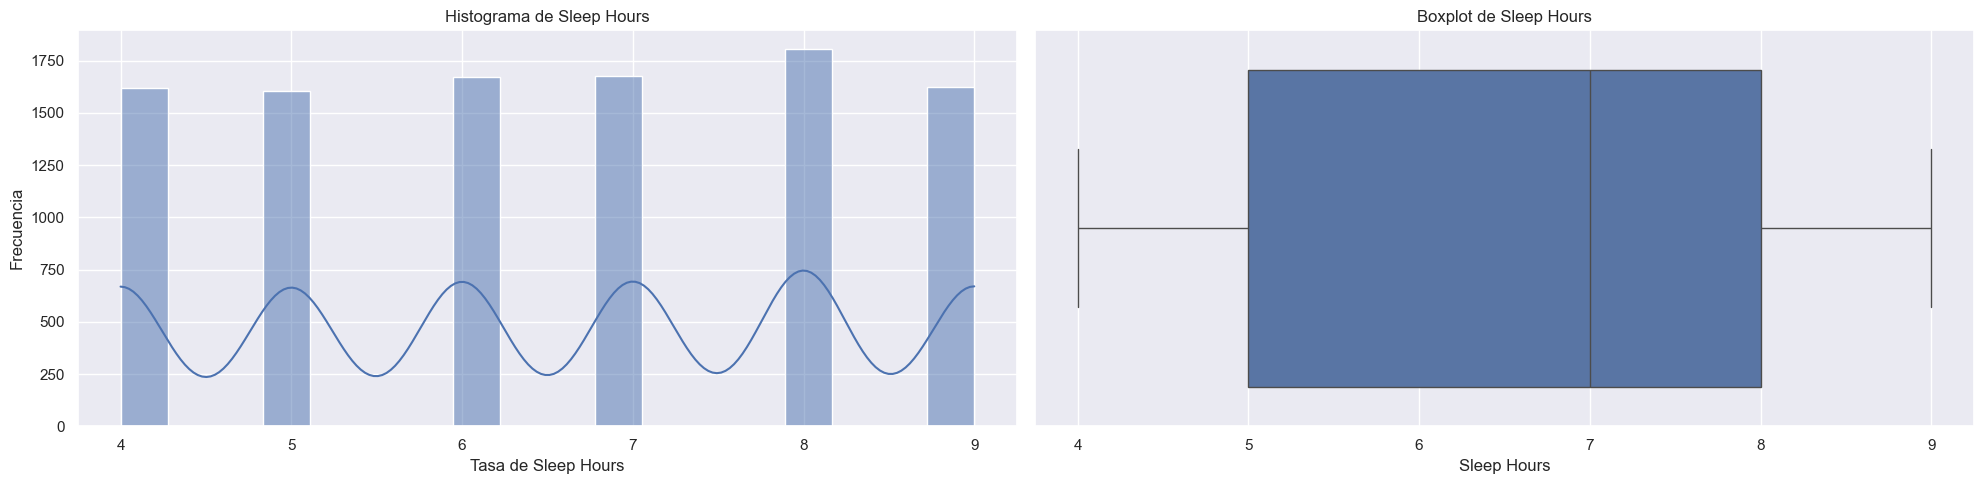

count    10000.000000
mean         6.530600
std          1.695863
min          4.000000
25%          5.000000
50%          7.000000
75%          8.000000
max          9.000000
Name: Sleep Hours, dtype: float64

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(studen_performance['Sleep Hours'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de Sleep Hours')
axs[0].set_xlabel('Tasa de Sleep Hours')
axs[0].set_ylabel('Frecuencia')

# Cuartiles
q1 = studen_performance['Sleep Hours'].quantile(0.25)
q2 = studen_performance['Sleep Hours'].quantile(0.5)
q3 = studen_performance['Sleep Hours'].quantile(0.75)

# Boxplot
sns.boxplot(x=studen_performance['Sleep Hours'], ax=axs[1])
axs[1].set_title('Boxplot de Sleep Hours')
axs[1].set_xlabel('Sleep Hours')

plt.tight_layout()
plt.show()

studen_performance['Sleep Hours'].describe()

no hay outliers

### Sample Question Papers Practiced

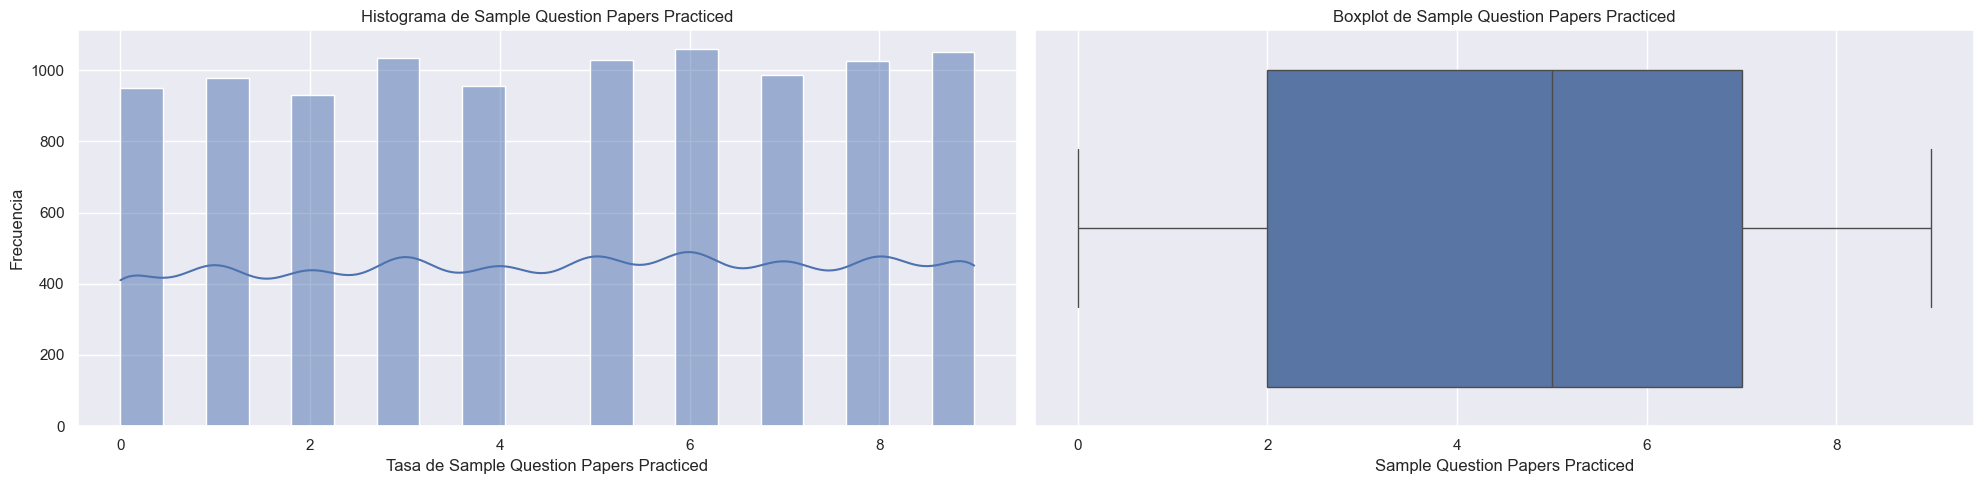

count    10000.000000
mean         4.583300
std          2.867348
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Sample Question Papers Practiced, dtype: float64

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(studen_performance['Sample Question Papers Practiced'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de Sample Question Papers Practiced')
axs[0].set_xlabel('Tasa de Sample Question Papers Practiced')
axs[0].set_ylabel('Frecuencia')

# Cuartiles
q1 = studen_performance['Sample Question Papers Practiced'].quantile(0.25)
q2 = studen_performance['Sample Question Papers Practiced'].quantile(0.5)
q3 = studen_performance['Sample Question Papers Practiced'].quantile(0.75)

# Boxplot
sns.boxplot(x=studen_performance['Sample Question Papers Practiced'], ax=axs[1])
axs[1].set_title('Boxplot de Sample Question Papers Practiced')
axs[1].set_xlabel('Sample Question Papers Practiced')

plt.tight_layout()
plt.show()

studen_performance['Sample Question Papers Practiced'].describe()

no hay outliers

# NN de regresión

Dividimos los datos en `X`, `X_base` e `y`. Luego estandarizamos estos datos y finalmente creamos dos modelos:

- Modelo base: este modelo tiene unicamente a las dos variables independientes que segun nuestra matris pueden llegar a tener una alta correlacion lineal con la target, es decir, X_base = `Hours Studied` y `Previous Scores`

- Modelo: este modelo tiene a todas las variables

In [14]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X_base = studen_performance[['Hours Studied', 'Previous Scores']]
X = studen_performance.drop(columns='Performance Index')
y = studen_performance['Performance Index']

# Standardize the features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X_base = pd.DataFrame(scaler.fit_transform(X_base))

X.columns = studen_performance.drop(columns='Performance Index').columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y, test_size=0.2, random_state=42)

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.constraints import MinMaxNorm
import matplotlib.pyplot as plt

model = Sequential([
      Input(shape=(5,)),
      Dense(1, activation='relu'),
      Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3422.9788 - mse: 3422.9788 - val_loss: 3320.9797 - val_mse: 3320.9797
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3337.4375 - mse: 3337.4375 - val_loss: 3252.9978 - val_mse: 3252.9978
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3208.5376 - mse: 3208.5376 - val_loss: 3165.6716 - val_mse: 3165.6716
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3184.7510 - mse: 3184.7510 - val_loss: 3057.6707 - val_mse: 3057.6707
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2997.8750 - mse: 2997.8750 - val_loss: 2930.2061 - val_mse: 2930.2061
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2900.7161 - mse: 2900.7161 - val_loss: 2786.7258 - val_mse: 2786.7258
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2745.3662 - mse: 2745.3662 - val_loss: 2631.3760 - val_mse: 2631.3760
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2584.6484 - mse: 2584.6484 - v

In [16]:
model_base = Sequential([
      Input(shape=(2,)),
      Dense(10, activation='relu'),
      Dense(1)
])

model_base.compile(optimizer='adam', loss='mse', metrics=['mse'])

history_base = model_base.fit(X_train_base, y_train_base, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3449.1379 - mse: 3449.1379 - val_loss: 3350.7200 - val_mse: 3350.7200
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3371.7620 - mse: 3371.7620 - val_loss: 3237.6877 - val_mse: 3237.6877
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3220.0762 - mse: 3220.0762 - val_loss: 3097.9629 - val_mse: 3097.9629
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3077.1741 - mse: 3077.1741 - val_loss: 2918.4333 - val_mse: 2918.4333
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 2901.3369 - mse: 2901.3369 - val_loss: 2669.5662 - val_mse: 2669.5662
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2644.5796 - mse: 2644.5796 - val_loss: 2334.5056 - val_mse: 2334.5056
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2299.2832 - mse: 2299.2832 - val_loss: 1952.1736 - val_mse: 1952.1736
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1856.0359 - mse: 1856.0359 -

A un simple vistazo el modelo es mejor que el modelo base ya que este logra un mejor mse, imprimos sus metricas y graficamos el loss de ambos

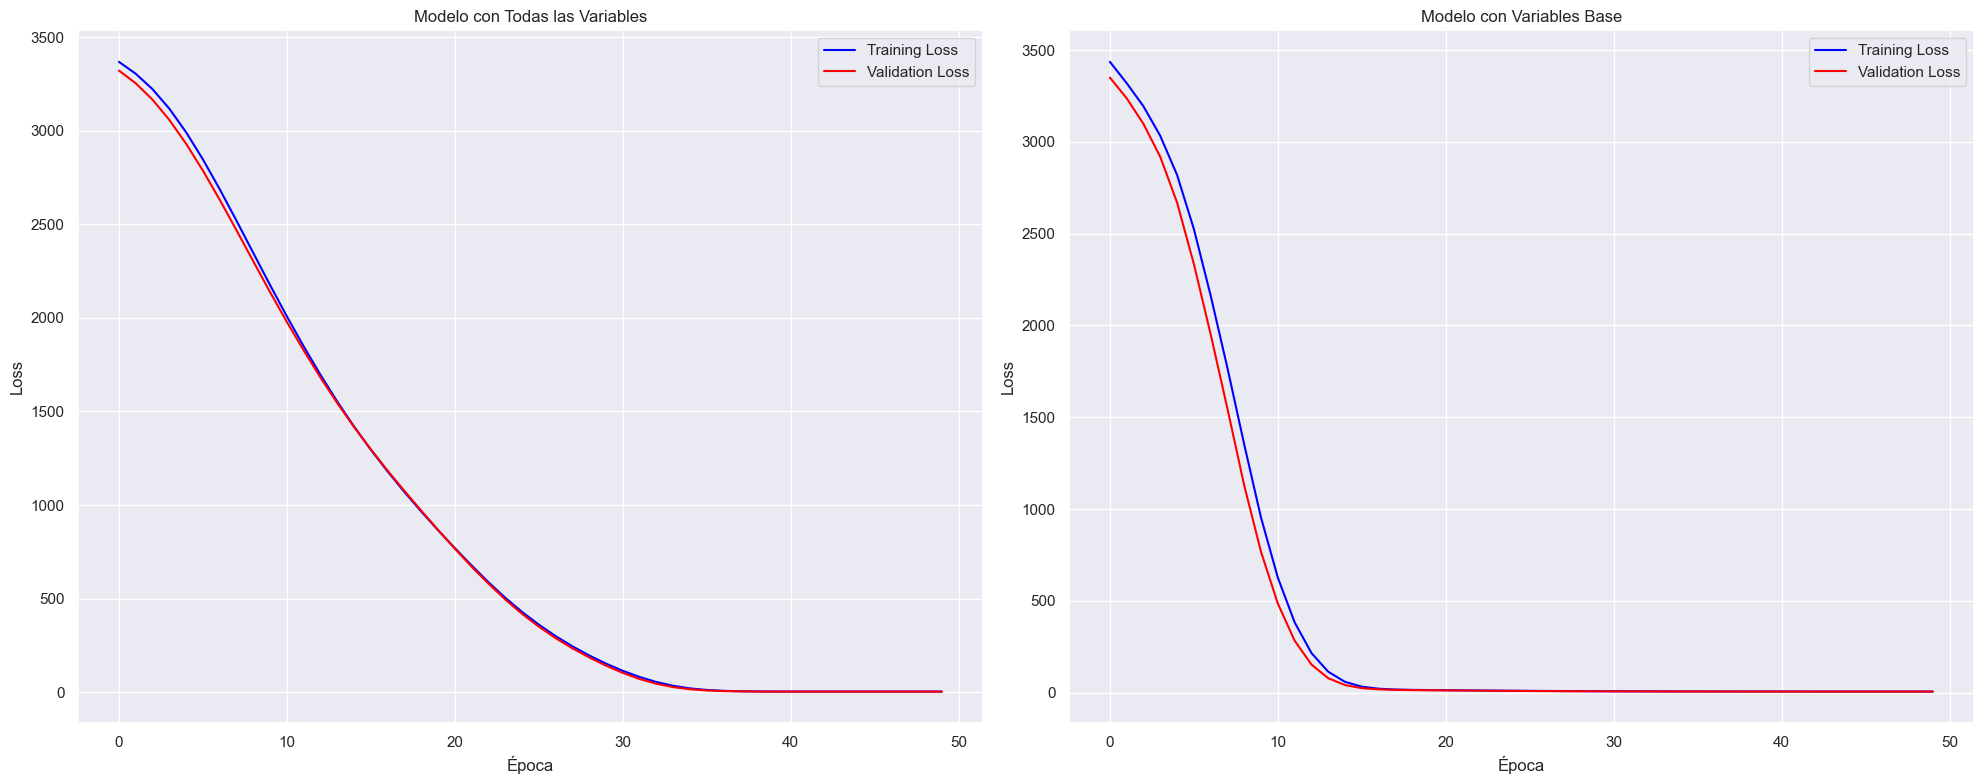

Evaluación del modelo con todas las variables:
MSE: 4.0819, MAE: 4.0819

Evaluación del modelo con variables base:
MSE: 5.6310, MAE: 5.6310


In [18]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import pandas as pd


# Function to plot loss
def plot_loss_comparison(history_all, history_base):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Plot for model with all variables
    ax1.plot(history_all.history['loss'], label='Training Loss', color='blue')
    ax1.plot(history_all.history['val_loss'], label='Validation Loss', color='red')
    ax1.set_title('Modelo con Todas las Variables')
    ax1.set_xlabel('Época')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot for base model
    ax2.plot(history_base.history['loss'], label='Training Loss', color='blue')
    ax2.plot(history_base.history['val_loss'], label='Validation Loss', color='red')
    ax2.set_title('Modelo con Variables Base')
    ax2.set_xlabel('Época')
    ax2.set_ylabel('Loss')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Evaluate models
def evaluate_models(model_all, model_base, X_test, X_test_base, y_test):
    print("Evaluación del modelo con todas las variables:")
    results_all = model_all.evaluate(X_test, y_test, verbose=0)
    print(f'MSE: {results_all[0]:.4f}, MAE: {results_all[1]:.4f}')

    print("\nEvaluación del modelo con variables base:")
    results_base = model_base.evaluate(X_test_base, y_test, verbose=0)
    print(f'MSE: {results_base[0]:.4f}, MAE: {results_base[1]:.4f}')

# Plot results
plot_loss_comparison(history, history_base)

# Evaluate models
evaluate_models(model, model_base, X_test, X_test_base, y_test)

Vemos como el modelo que tiene todas las variables logra por poco ser mejor en termino de las metricas `mse` y `mae` que el modelo base.